In [1]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
from collections import defaultdict
import pickle
%matplotlib inline

Cellular Component


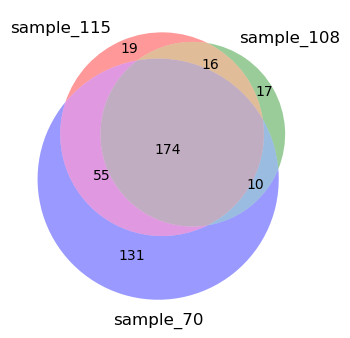

Molecular Function


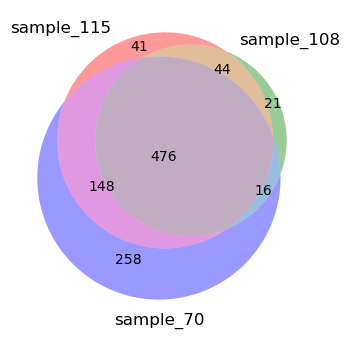

Biological Process


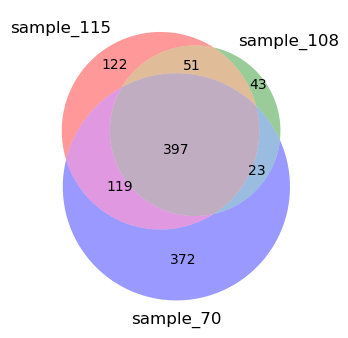

C
7.834101382488479
P
8.365758754863812
F
3.7701974865350087


In [2]:
mapping = {"P":"Biological Process", "F": "Molecular Function", "C": "Cellular Component"}
dataset = pickle.load(open("venn_data.p", "rb"))
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
category_sets = defaultdict(list)
samples = set(["sample_70", "sample_108", "sample_115"])
sample_sets = defaultdict(dict)
for sample in dataset.keys():
    if sample in samples:
        for category in dataset[sample].keys():
            set_data = dataset[sample][category]
            sample_sets[sample][category] = set_data
            category_sets[category].append((sample, set_data))
for category in category_sets.keys():
    print (mapping[category])
    venn3([el[1] for el in category_sets[category]], tuple([el[0] for el in category_sets[category]]))
    plt.show()
for cat in ("C", "P", "F"):
    print (cat)
    print (len(sample_sets["sample_108"][cat].difference(sample_sets["sample_115"][cat].union(sample_sets["sample_70"][cat])))/len(sample_sets["sample_108"][cat])*100)
    

In [3]:
from supervenn import supervenn

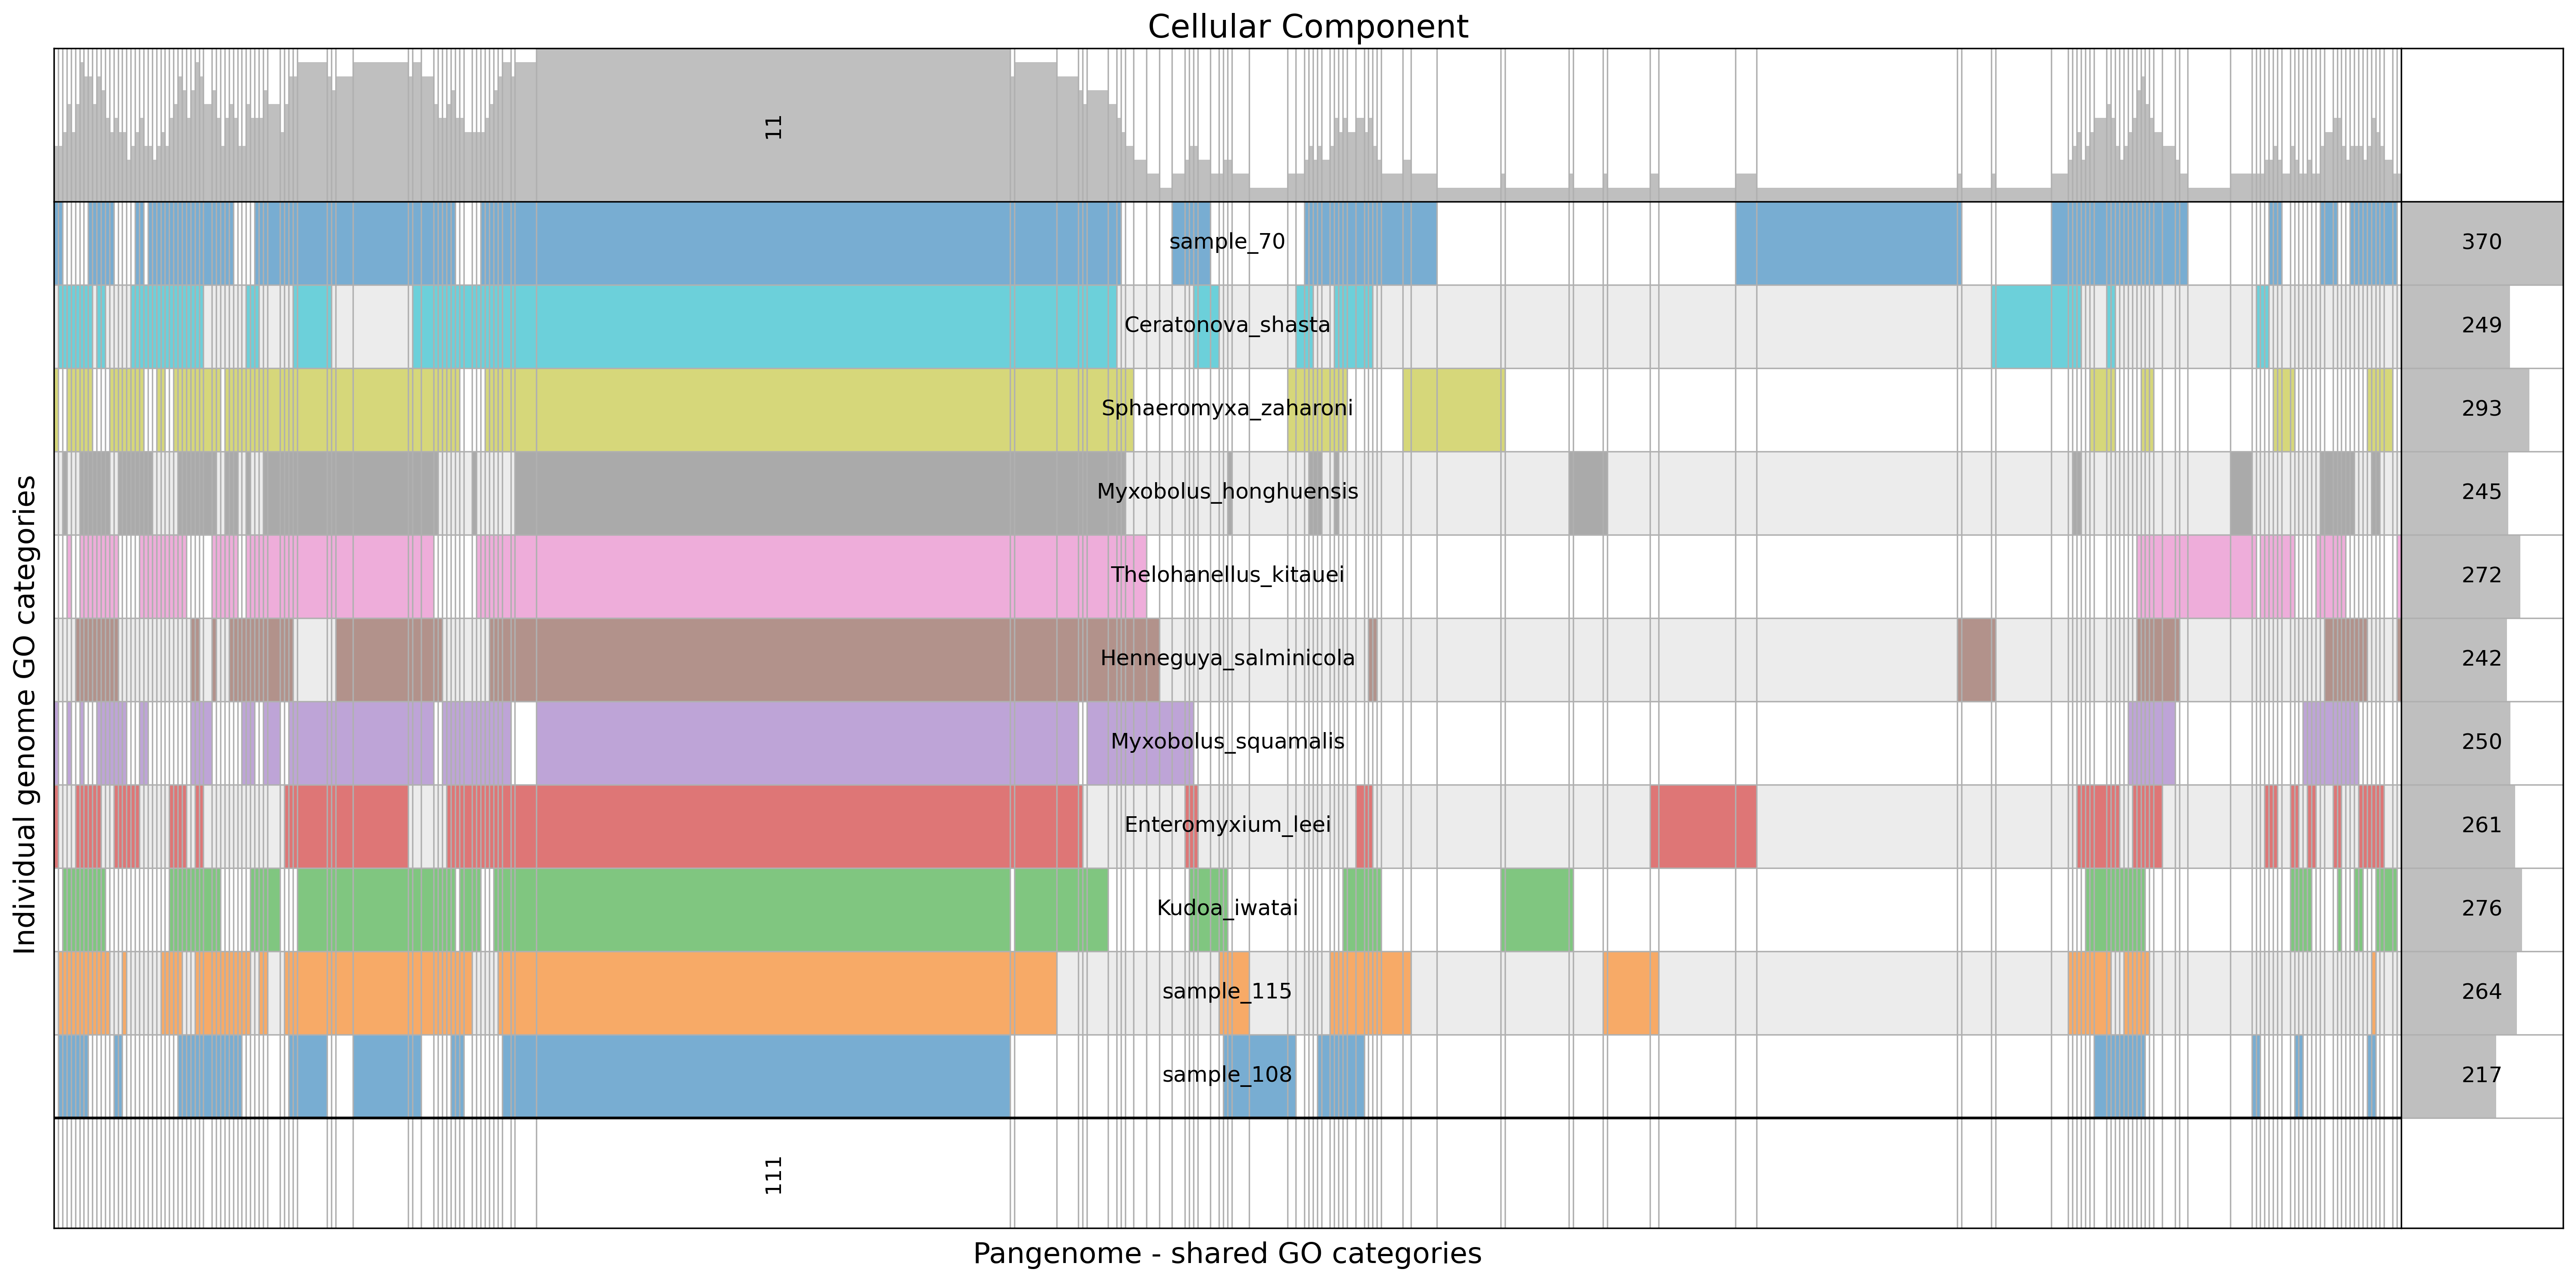

In [4]:
category_sets = defaultdict(list)
samples = set(["sample_70", "sample_108", "sample_115"])
for sample in dataset.keys():
    for category in dataset[sample].keys():
        set_data = dataset[sample][category]
        category_sets[category].append((sample, set_data))
for category in category_sets.keys():
    if category == "C":
        plt.figure(figsize=(20, 10), dpi=300)
        plt.title(mapping[category], fontsize=18)
        supervenn([el[1] for el in category_sets[category]], [el[0] for el in category_sets[category]], rotate_col_annotations=True,
        col_annotations_area_height=1.2, sets_ordering='minimize gaps', min_width_for_annotation=100, )
        plt.show()

In [5]:
for category in category_sets.keys():
    print (category)
    u = set.intersection(*[el[1] for el in category_sets[category]])
    print (len(u))

F
270
P
216
C
111


In [6]:
dataset2 = pickle.load(open("counts_data.p", "rb"))

C


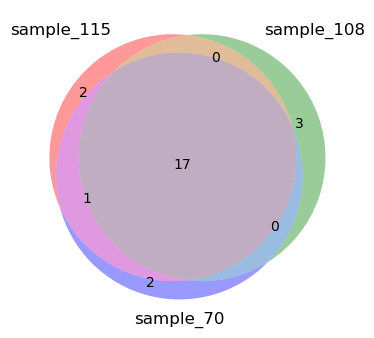

F


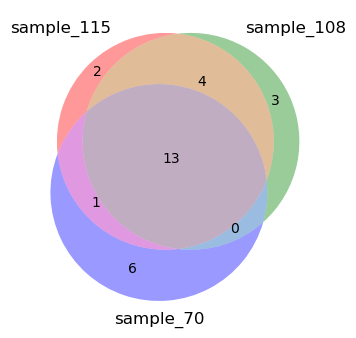

P


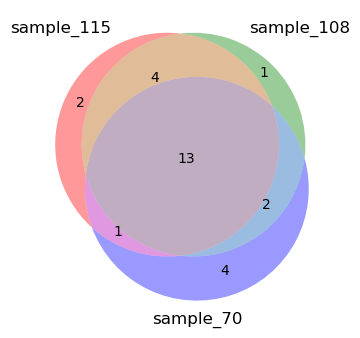

In [8]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
category_sets = defaultdict(list)
samples = set(["sample_70", "sample_108", "sample_115"])
for sample in dataset2.keys():
    if sample in samples:
        for category in dataset[sample].keys():
            set_data = set([el[0] for el in dataset2[sample][category][0:20]])
            category_sets[category].append((sample, set_data))
for category in category_sets.keys():
    print (category)
    venn3([el[1] for el in category_sets[category]], tuple([el[0] for el in category_sets[category]]))
    plt.show()

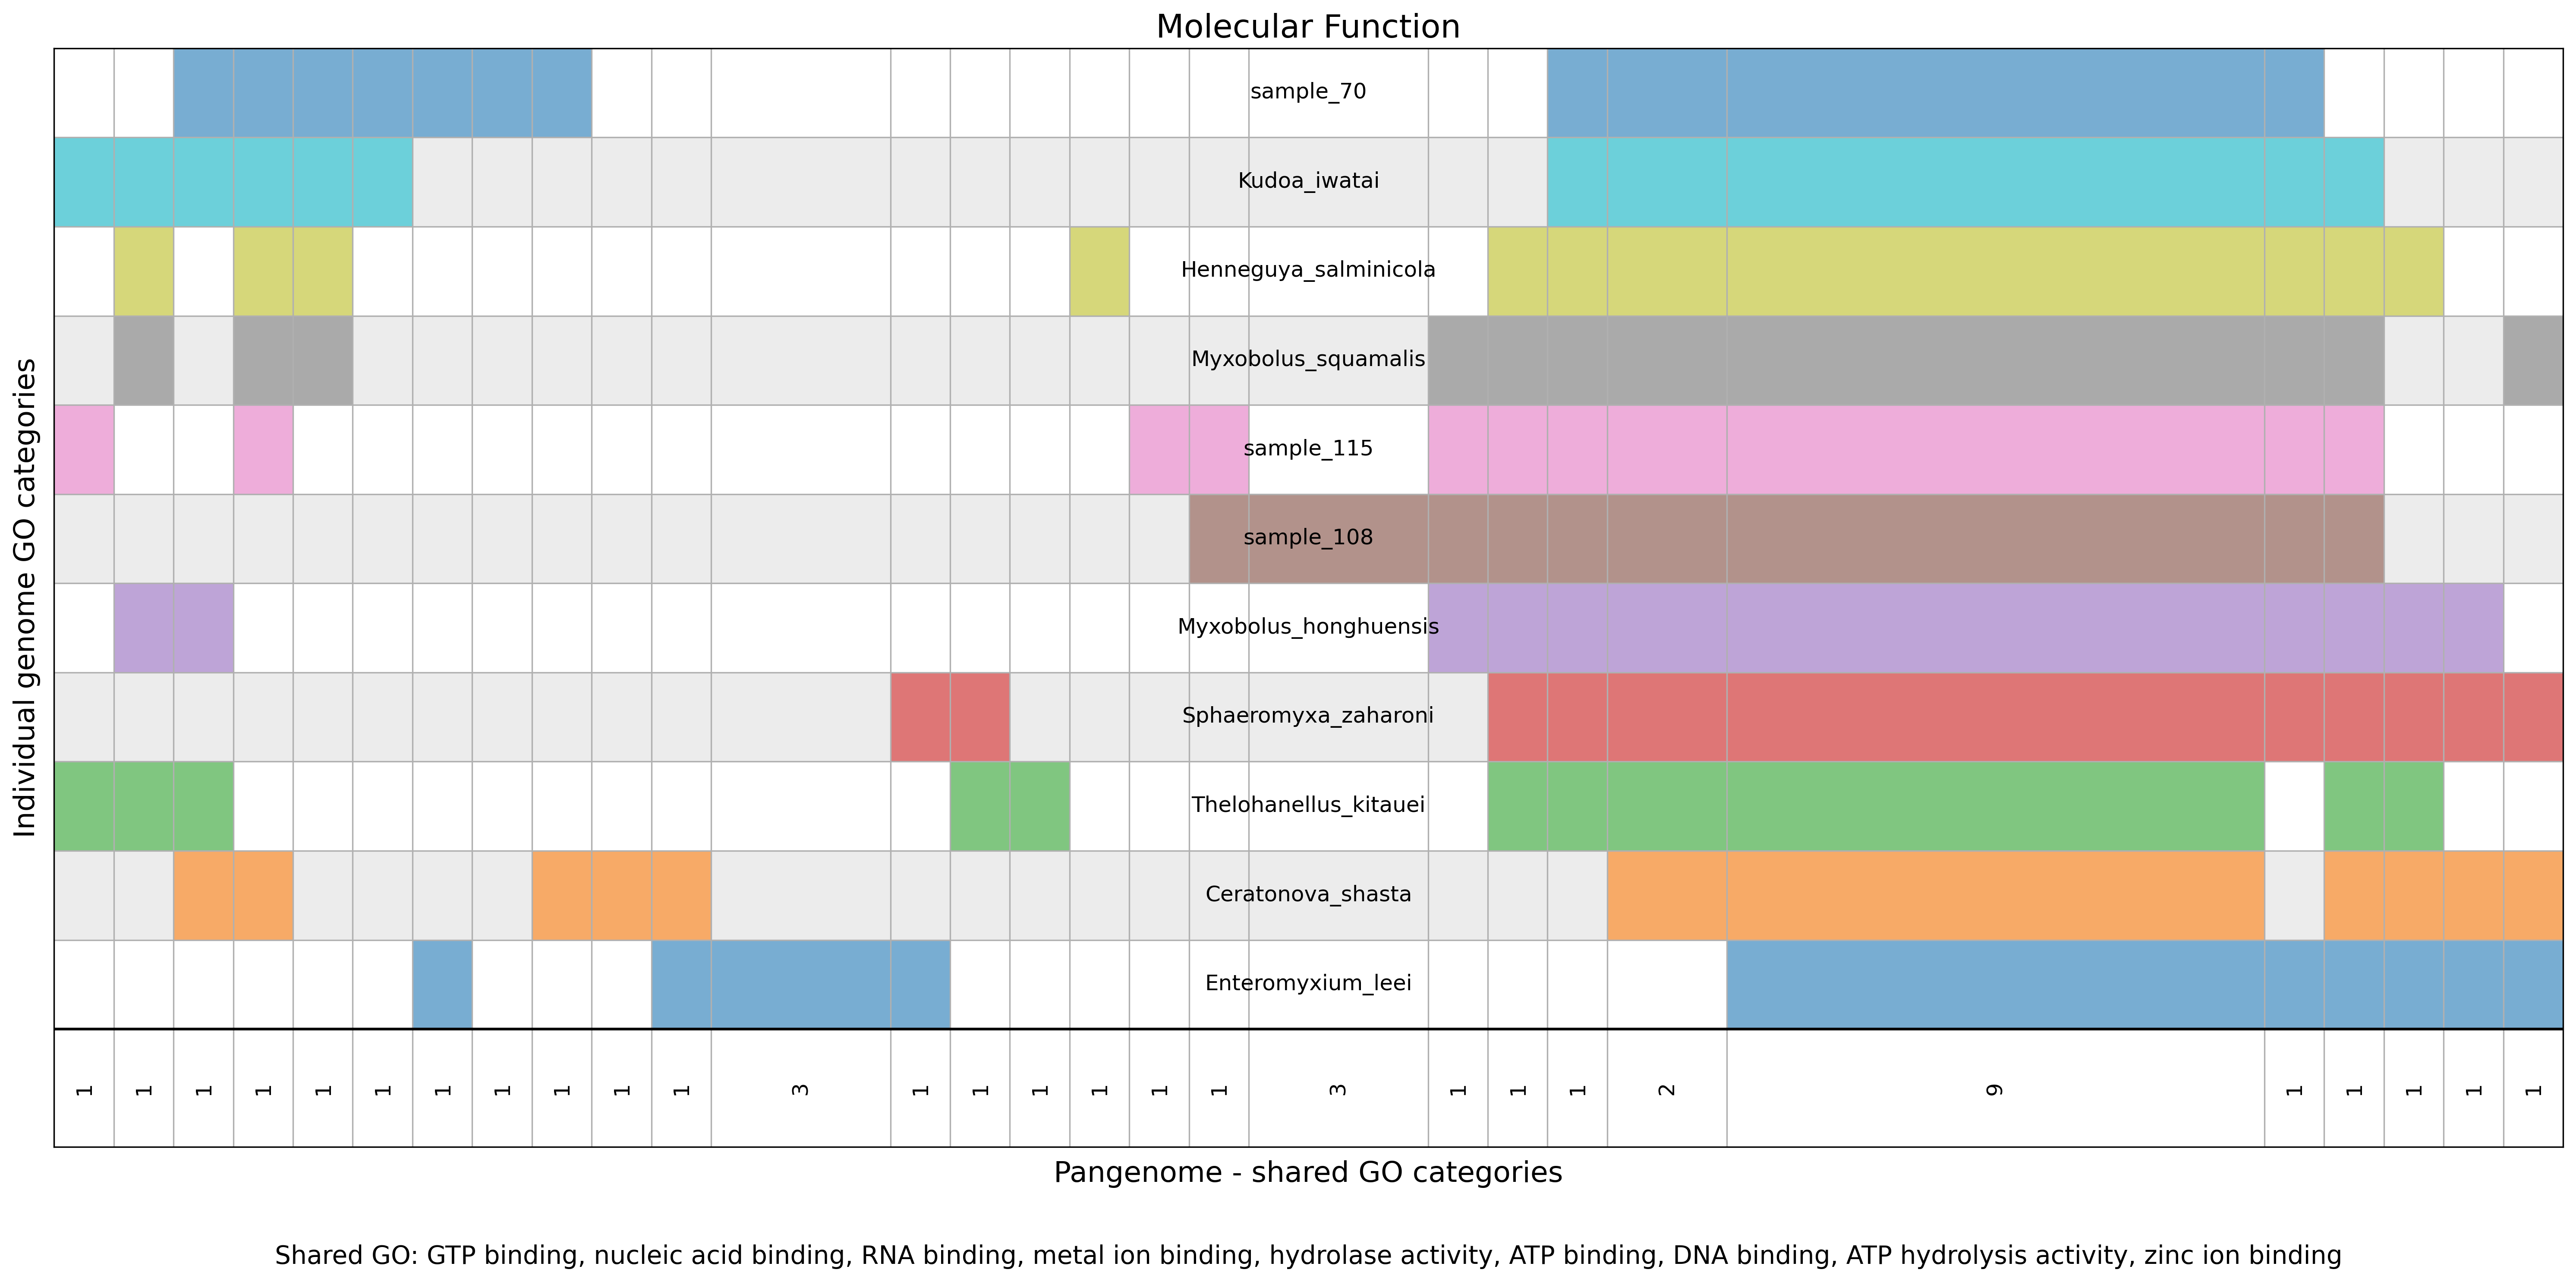

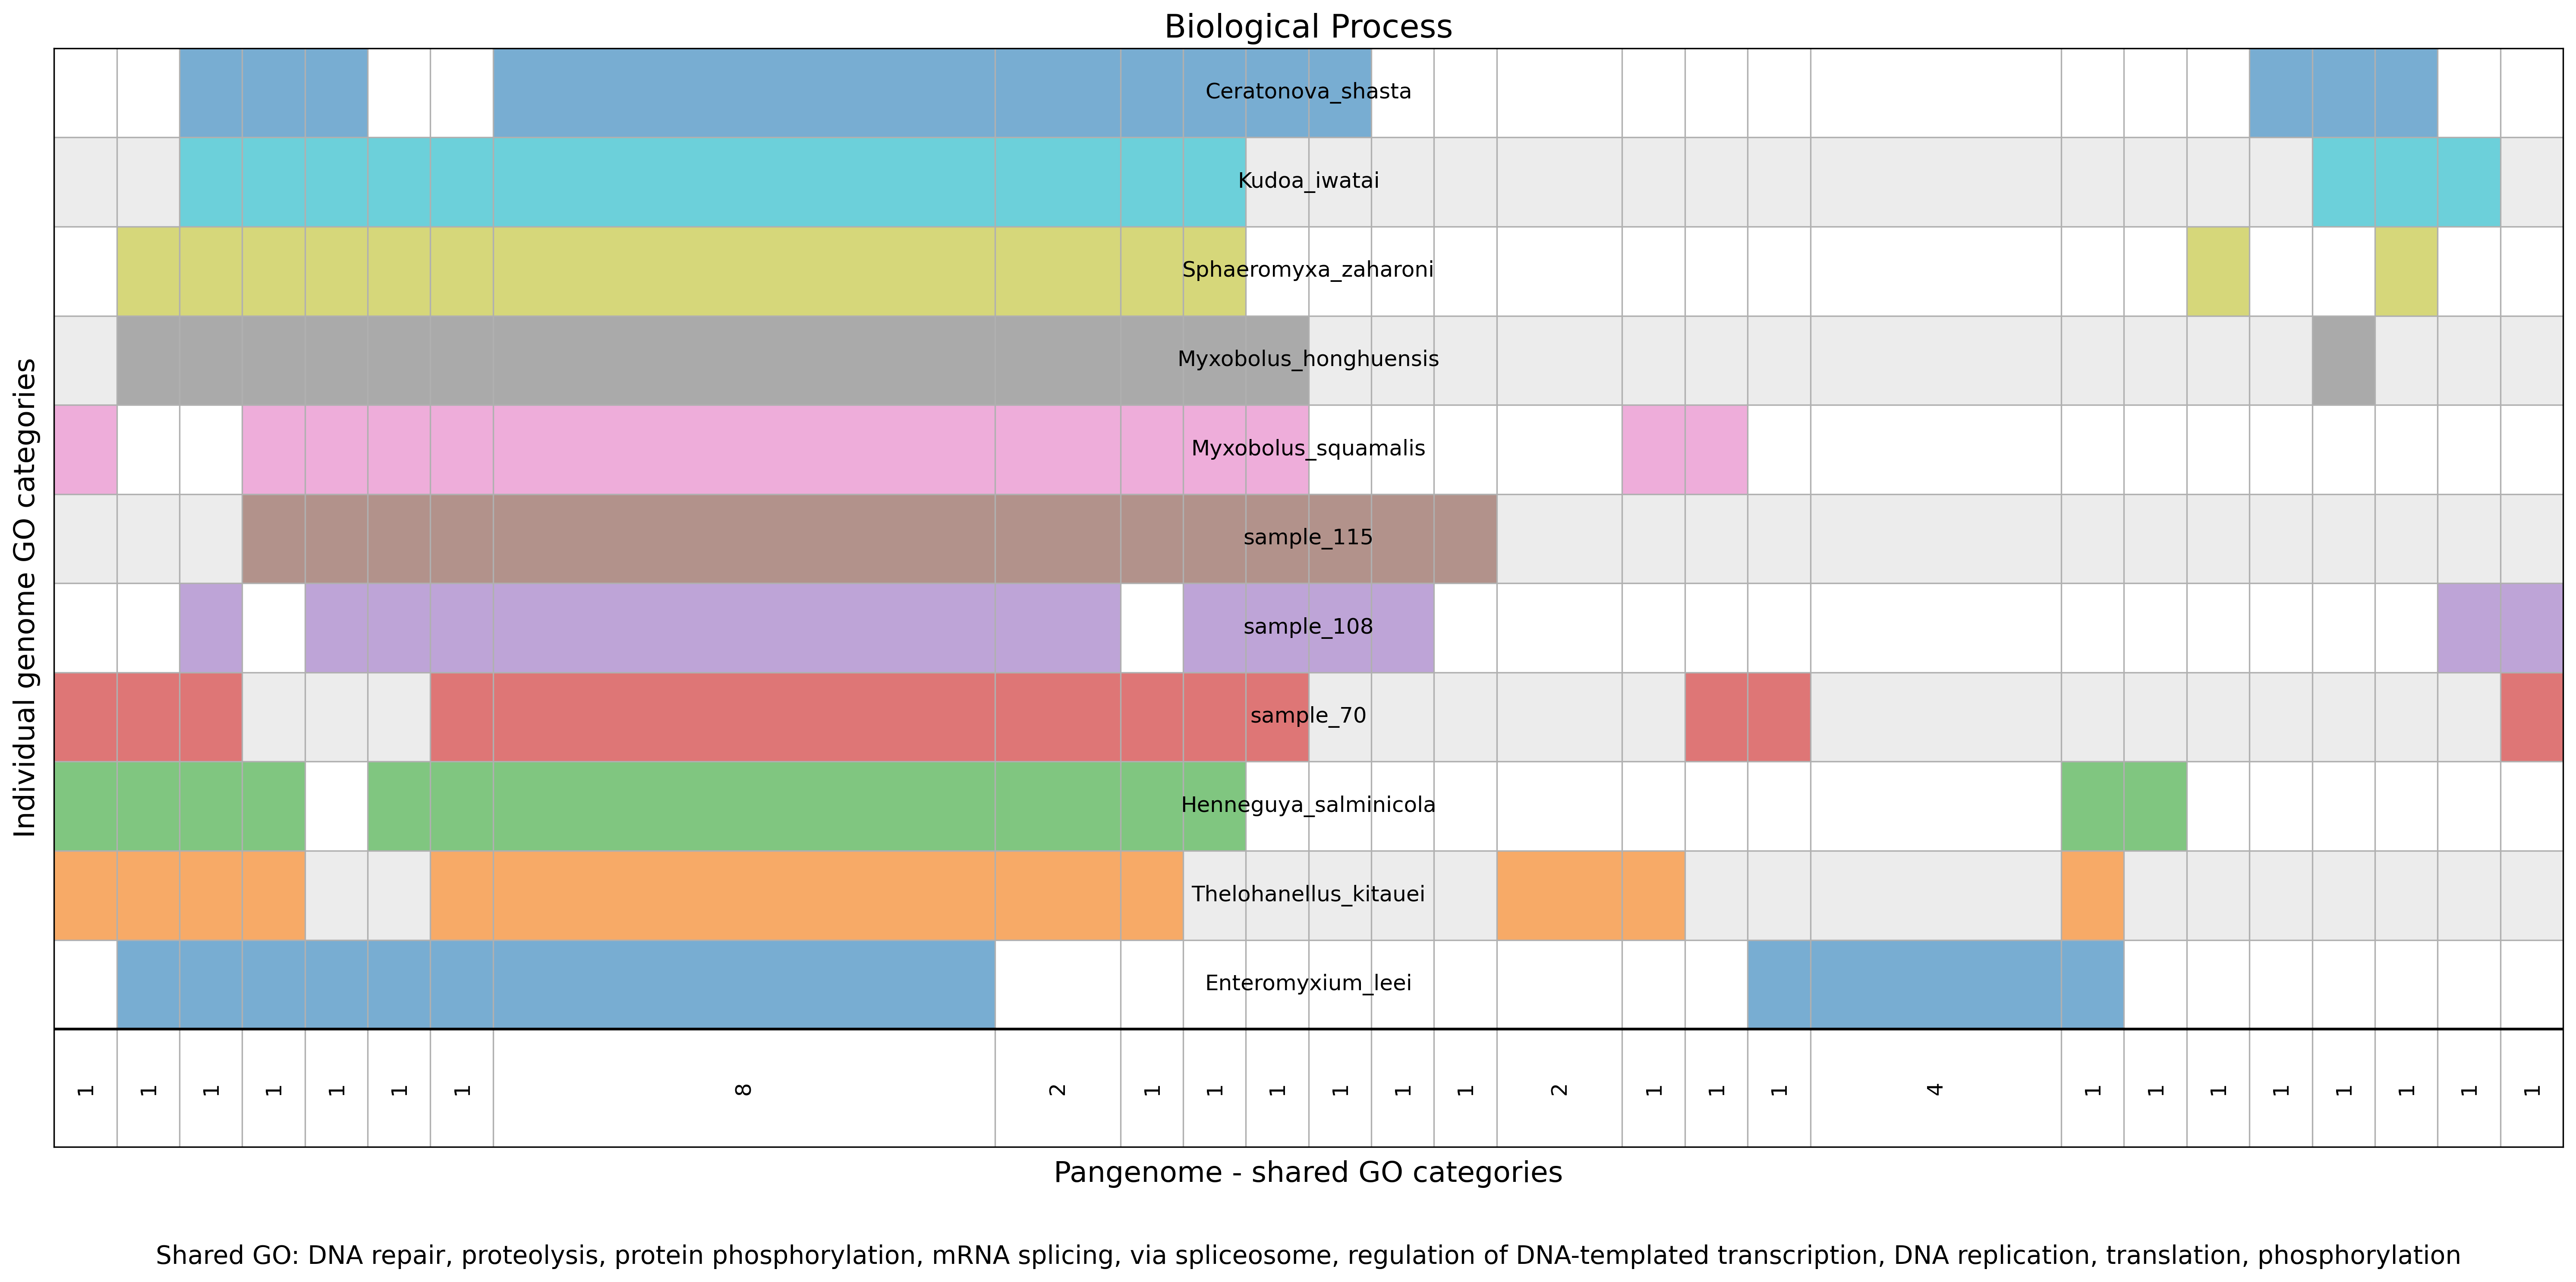

/tmp/ipykernel_2086138/2329405397.py:16: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.savefig("{}.png".format(mapping[category]))


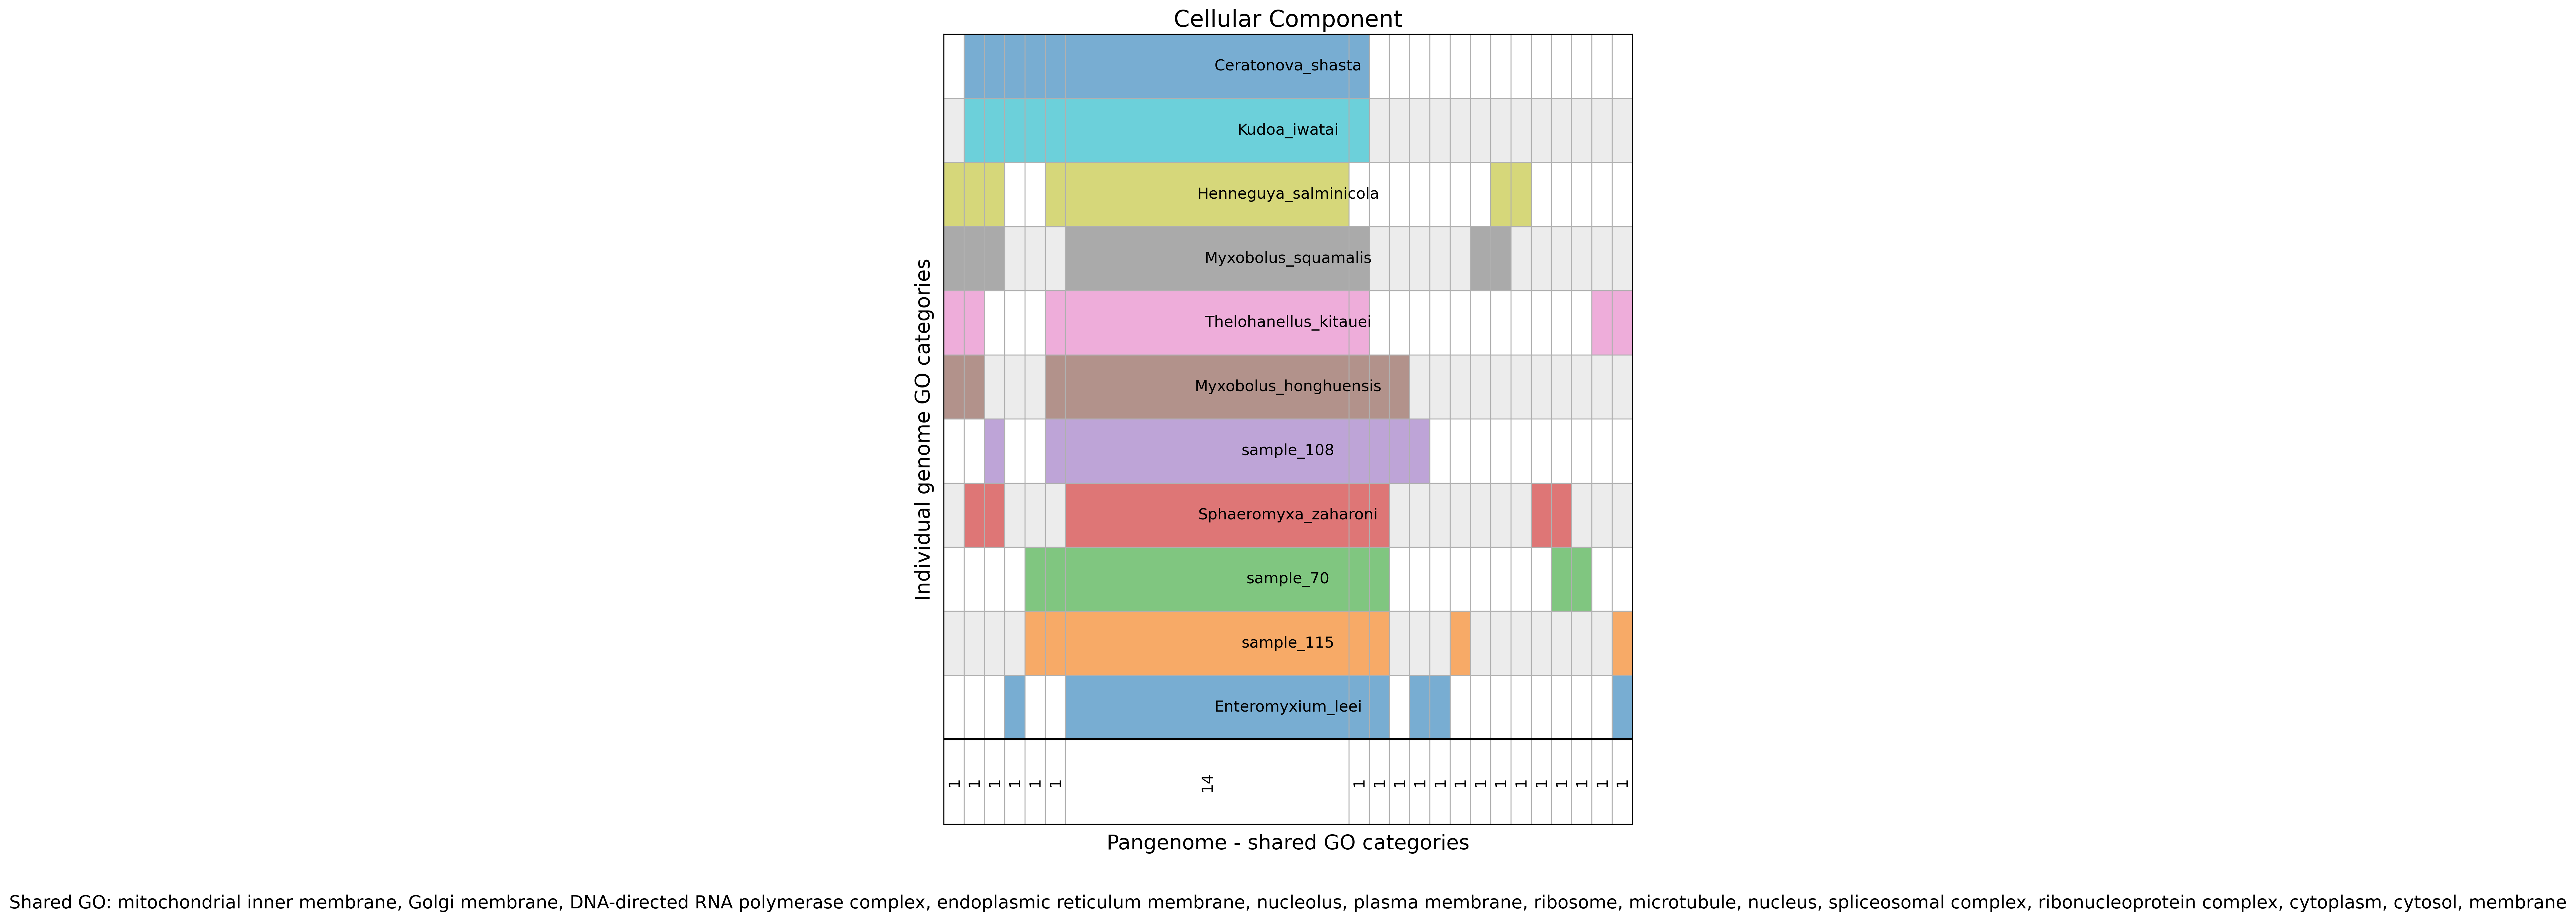

In [22]:
from collections import defaultdict
category_sets = defaultdict(list)
samples = set(["sample_70", "sample_108", "sample_115"])
for sample in dataset2.keys():
    for category in dataset2[sample].keys():
        set_data = set([el[0] for el in dataset2[sample][category][0:20]])
        category_sets[category].append((sample, set_data))
for category in category_sets.keys():
    plt.figure(figsize=(20, 10), dpi=300)
    plt.title(mapping[category], fontsize=18)
    supervenn([el[1] for el in category_sets[category]], [el[0] for el in category_sets[category]], rotate_col_annotations=True,
          col_annotations_area_height=1.2, sets_ordering='minimize gaps', side_plots=False)
    shared = list(set.intersection(*[el[1] for el in category_sets[category]]))
    description = "Shared GO: {}".format(", ".join(shared))
    plt.text(0.5, -0.1, description, ha='center', va='center', transform=plt.gca().transAxes, fontsize=14)
    plt.savefig("{}.png".format(mapping[category]))
    plt.show()

In [14]:
for category in category_sets.keys():
    print (set.intersection(*[el[1] for el in category_sets[category]]))

{'GTP binding', 'nucleic acid binding', 'RNA binding', 'metal ion binding', 'hydrolase activity', 'ATP binding', 'DNA binding', 'ATP hydrolysis activity', 'zinc ion binding'}
{'DNA repair', 'proteolysis', 'protein phosphorylation', 'mRNA splicing, via spliceosome', 'regulation of DNA-templated transcription', 'DNA replication', 'translation', 'phosphorylation'}
{'mitochondrial inner membrane', 'Golgi membrane', 'DNA-directed RNA polymerase complex', 'endoplasmic reticulum membrane', 'nucleolus', 'plasma membrane', 'ribosome', 'microtubule', 'nucleus', 'spliceosomal complex', 'ribonucleoprotein complex', 'cytoplasm', 'cytosol', 'membrane'}


F


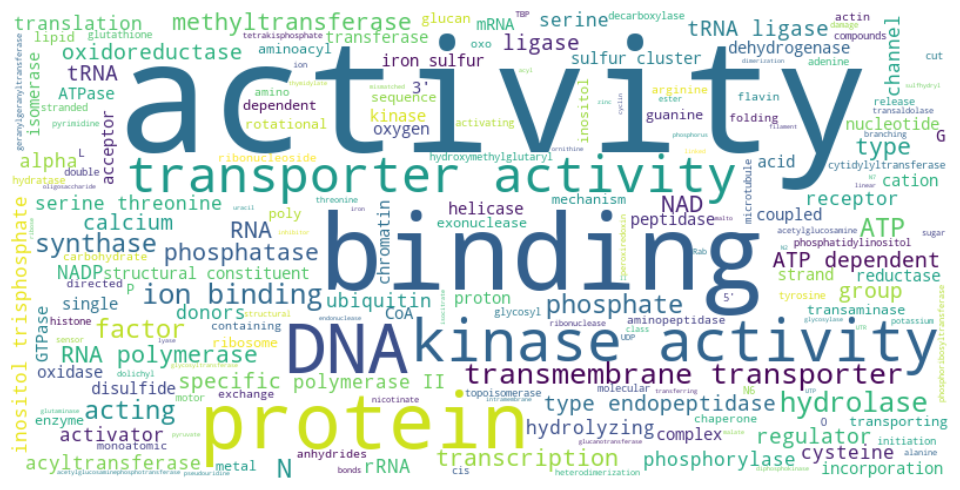

P


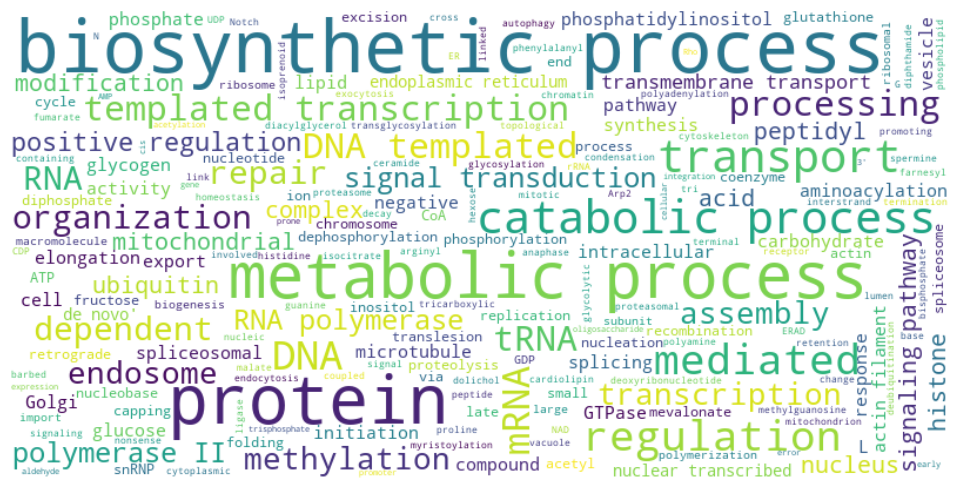

C


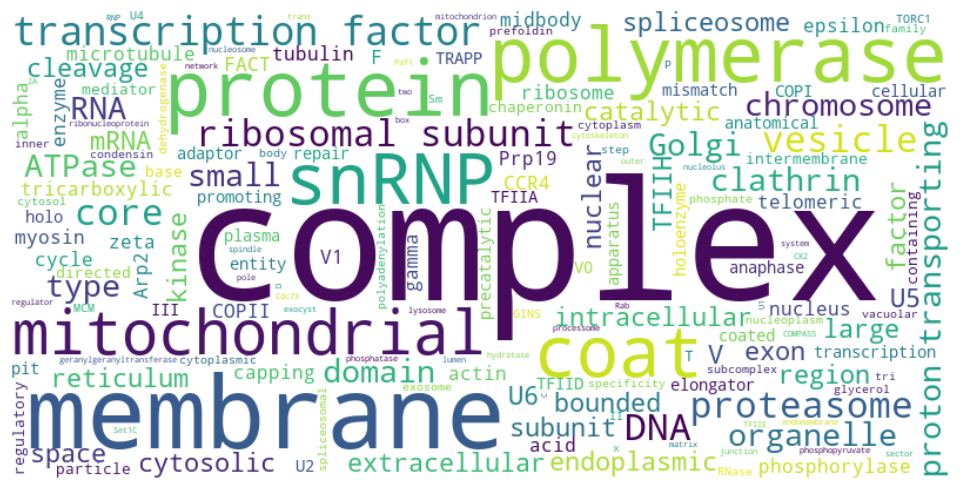

In [44]:
from wordcloud import WordCloud
category_sets = defaultdict(list)
samples = set(["sample_70", "sample_108", "sample_115"])
for sample in dataset.keys():
    for category in dataset[sample].keys():
        set_data = dataset[sample][category]
        category_sets[category].append((sample, set_data))
for category in category_sets.keys():
    print (category)
    list_words = []
    list_words = list(set.intersection(*[el[1] for el in category_sets[category]]))
    text = " ".join(list_words)
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

Molecular Function
['GTP binding', 'nucleic acid binding', 'RNA binding', 'metal ion binding', 'hydrolase activity', 'ATP binding', 'DNA binding', 'ATP hydrolysis activity', 'zinc ion binding']
9 39140 76.8309679445655 47.11575500770416
##################


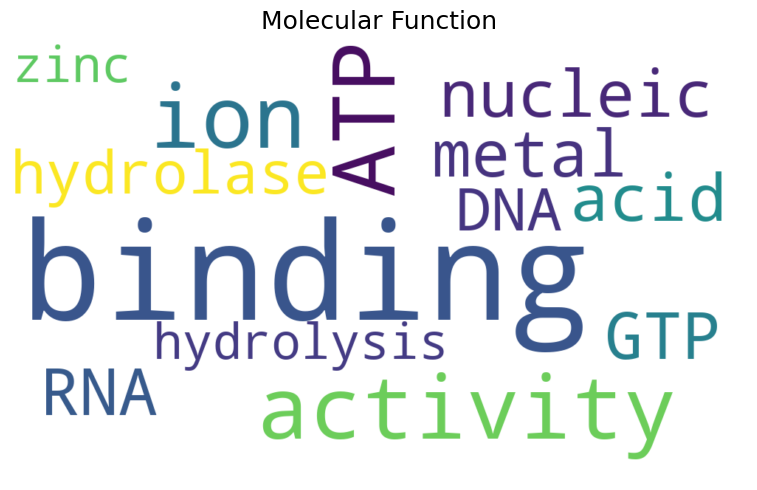

Biological Process
['DNA repair', 'proteolysis', 'protein phosphorylation', 'mRNA splicing, via spliceosome', 'regulation of DNA-templated transcription', 'DNA replication', 'translation', 'phosphorylation']
8 8339 43.80186994432188 19.578334468105087
##################


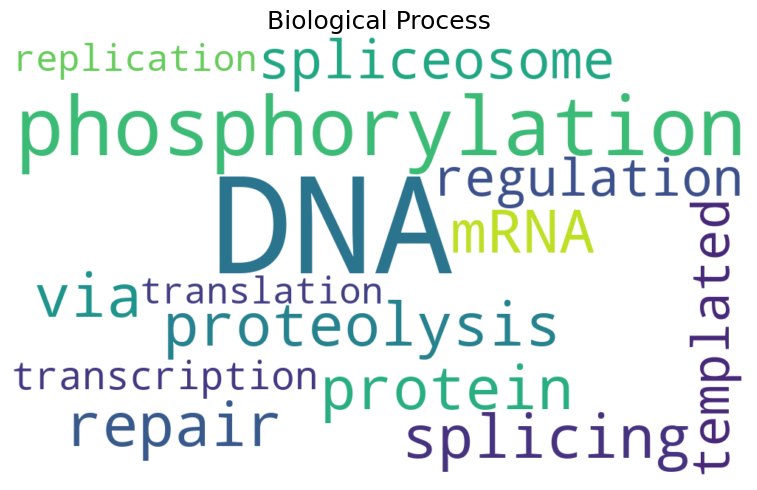

Cellular Component
['mitochondrial inner membrane', 'Golgi membrane', 'DNA-directed RNA polymerase complex', 'endoplasmic reticulum membrane', 'nucleolus', 'plasma membrane', 'ribosome', 'microtubule', 'nucleus', 'spliceosomal complex', 'ribonucleoprotein complex', 'cytoplasm', 'cytosol', 'membrane']
14 23186 92.6032430705328 69.63599231138875
##################


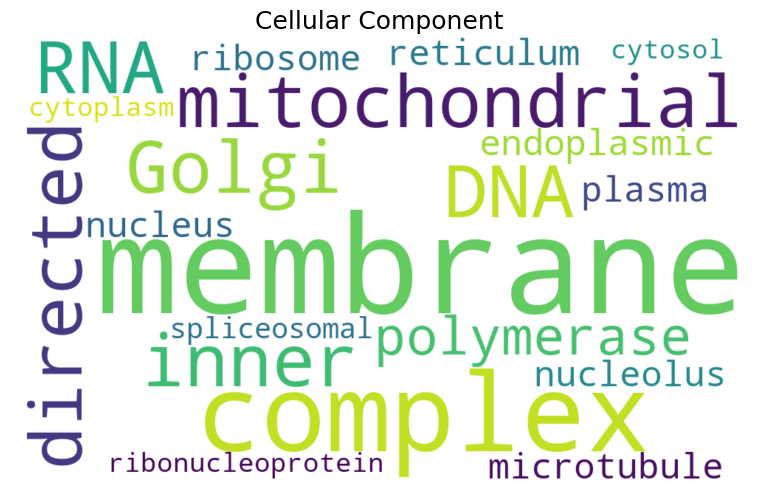

In [42]:
core_GO = {}
category_sets = defaultdict(list)
total20 = defaultdict(int)
total = defaultdict(int)
for sample in dataset2.keys():
    for category in dataset[sample].keys():
        set_data = set([el[0] for el in dataset2[sample][category][0:20]])
        total20[category] += sum([el[1] for el in dataset2[sample][category][0:20]])
        total[category] += sum([el[1] for el in dataset2[sample][category]])
        category_sets[category].append((sample, set_data))
for category in category_sets.keys():
    total_core = 0
    print (mapping[category])
    list_words = list(set.intersection(*[el[1] for el in category_sets[category]]))
    for core in list_words:
        for sample in dataset2.keys():
            for el in dataset2[sample][category]:
                if el[0] == core:
                    total_core += el[1]
    print (list_words)
    print (len(list_words), total_core, (total_core/total20[category])*100, (total_core/total[category])*100)
    print ("##################")
    core_GO[category] = list_words
    description = "Shared GO: {}".format(", ".join(list_words))
    pickle.dump(core_GO, open("core_GO.p", "wb"))
    text = " ".join(list_words)
    wordcloud = WordCloud(width=1000, height=600, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.title(mapping[category], fontsize=18)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    #plt.text(0.5, -0.1, description, ha='center', va='center', transform=plt.gca().transAxes)
    plt.show()

In [39]:
dataset2

{'Sphaeromyxa_zaharoni': {'F': [('nucleic acid binding', 4754),
   ('ATP binding', 1383),
   ('zinc ion binding', 739),
   ('metal ion binding', 626),
   ('RNA binding', 522),
   ('DNA binding', 480),
   ('aspartic-type endopeptidase activity', 301),
   ('GTP binding', 284),
   ('ATP hydrolysis activity', 251),
   ('hydrolase activity', 245),
   ('endonuclease activity', 239),
   ('RNA-directed DNA polymerase activity', 236),
   ('protein dimerization activity', 235),
   ('structural constituent of ribosome', 222),
   ('GTPase activity', 185),
   ('protein kinase activity', 148),
   ('helicase activity', 148),
   ('transmembrane transporter activity', 140),
   ('transferase activity', 133),
   ('methyltransferase activity', 133),
   ('DNA-directed DNA polymerase activity', 128),
   ('protein serine/threonine kinase activity', 124),
   ('translation initiation factor activity', 107),
   ('kinase activity', 88),
   ('oxidoreductase activity', 86),
   ('calcium ion binding', 84),
   ('RNA